# O problema de negócio

A fraude de cartão de crédito é uma realidade infeliz da vida. Faz de vítima organizações, consumidores, bancos e comerciantes a cada ano. 

Desde o começo dos pagamentos online sempre houveram os ladrões de dados financeiros. Isso se tornou um grande problema com a popularização do varejo online e mídias sociais.

Esse crime multibilionário tornou-se mais frequente no primeiro ano da pandemia. 

O conjunto de dados contém transações feitas durante 2 dias por cartões de crédito europeus em setembro de 2013.

Ele contém apenas variáveis ​​de entrada numéricas que são o resultado de uma transformação PCA. As características V1, V2, … V28 são os principais componentes obtidos com PCA. 

As únicas características que não foram transformadas com PCA são 'Time' e 'Amount'. 

O atributo 'Time' contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados. O recurso 'Amount' é o Valor da transação. 

O recurso 'Class' é a variável de resposta e assume valor 1 em caso de fraude e 0 caso contrário.

A base dedos está disponível em: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

# Importando os dados

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('/home/tomate/Documents/PORTFOLIO/DETECÇAO DE FRAUDES EM CARTAO DE CREDITO/creditcard.csv')

# Compreendendo a base de dados

In [31]:
df.shape

(284807, 31)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

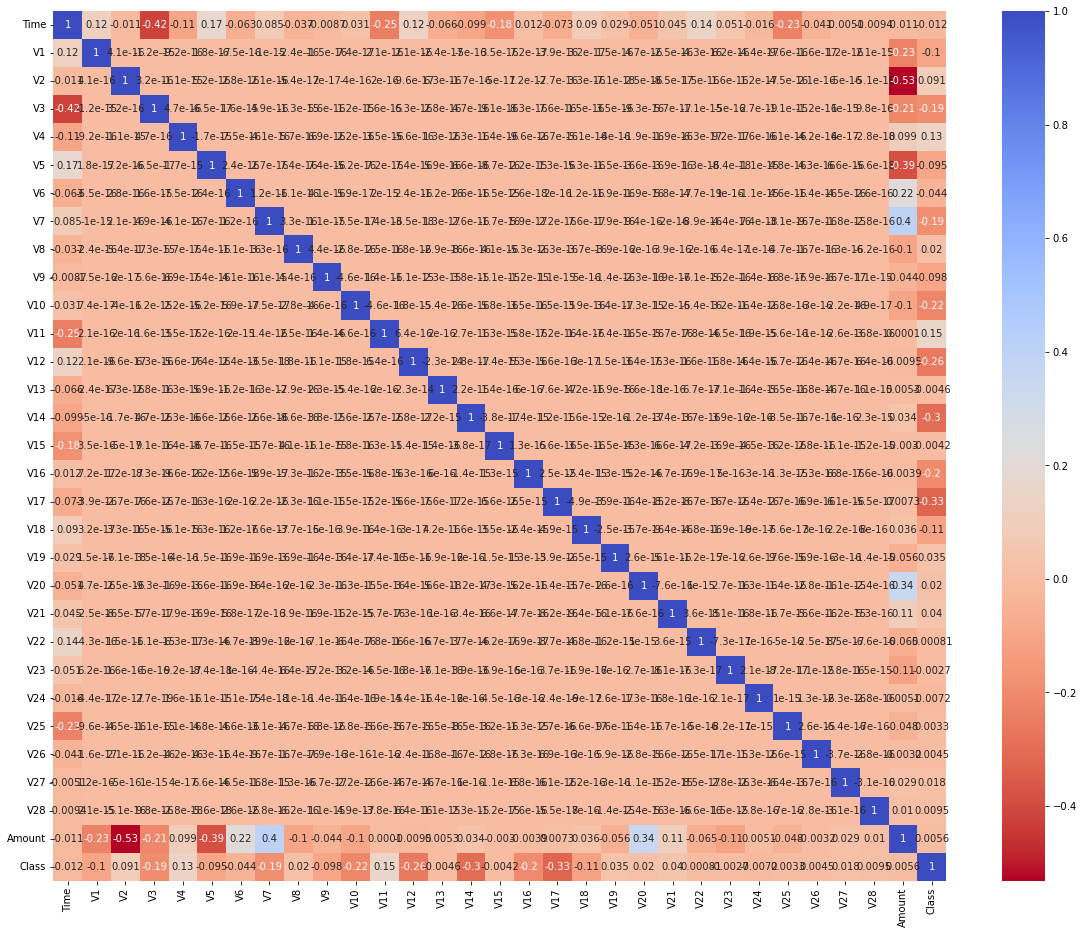

In [33]:
corr = df.corr()
plt.figure(figsize=(20,16))
sns.heatmap(corr, cmap='coolwarm_r', annot= True)
plt.show()

In [34]:
corrMatrix = df.corr().abs()
unstack = corrMatrix.unstack()
sorted = unstack.sort_values(ascending=False, kind="quicksort")
print(sorted[30:41])

Class   Class     1.000000
Amount  V2        0.531409
V2      Amount    0.531409
Time    V3        0.419618
V3      Time      0.419618
Amount  V7        0.397311
V7      Amount    0.397311
V5      Amount    0.386356
Amount  V5        0.386356
        V20       0.339403
V20     Amount    0.339403
dtype: float64


In [35]:
df.describe().round(2).V1

count    284807.00
mean          0.00
std           1.96
min         -56.41
25%          -0.92
50%           0.02
75%           1.32
max           2.45
Name: V1, dtype: float64

In [36]:
nop = sum(df.Class == 0)
fraude = sum(df.Class == 1)
tam = len(df.Class)
print(f'Não fraude: {nop}')
print(f'Fraude: {fraude}')
print(f'Porcentagem de fraudes: {fraude/nop*100:.2f}%')

Não fraude: 284315
Fraude: 492
Porcentagem de fraudes: 0.17%


In [37]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

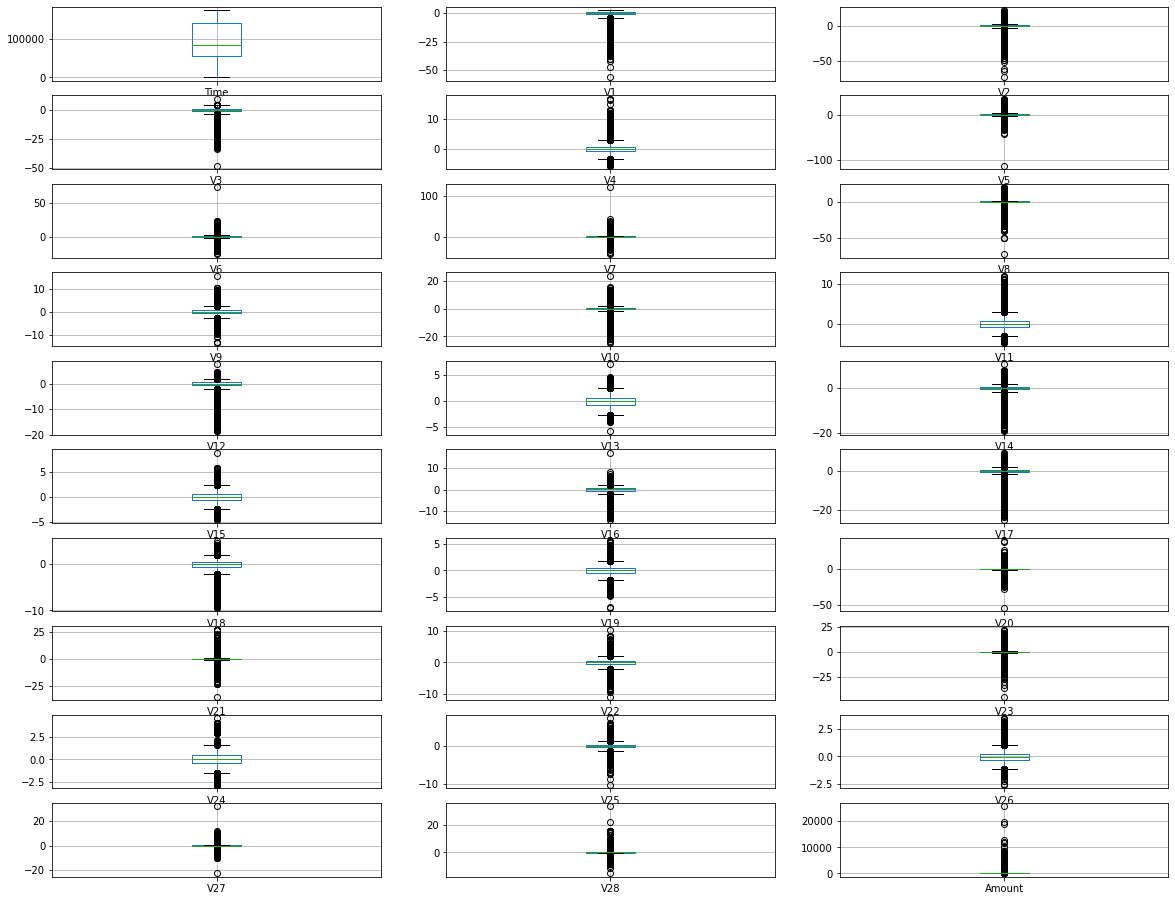

In [38]:
fig, axes = plt.subplots(10,3, figsize=(20,16))

for i, el in enumerate(list(df.columns.values)[:-1]):
    a = df.boxplot(el, ax=axes.flatten()[i])

plt.show()

<AxesSubplot:title={'center':'Unique values per feature'}>

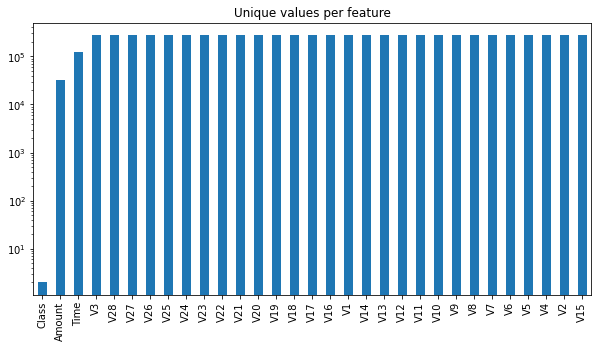

In [39]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.bar(logy=True, figsize=(10, 5), title="Unique values per feature")

In [40]:
duplicates = df.drop(labels=["Time", "Amount"], axis=1).duplicated().sum()
print(duplicates)

9144


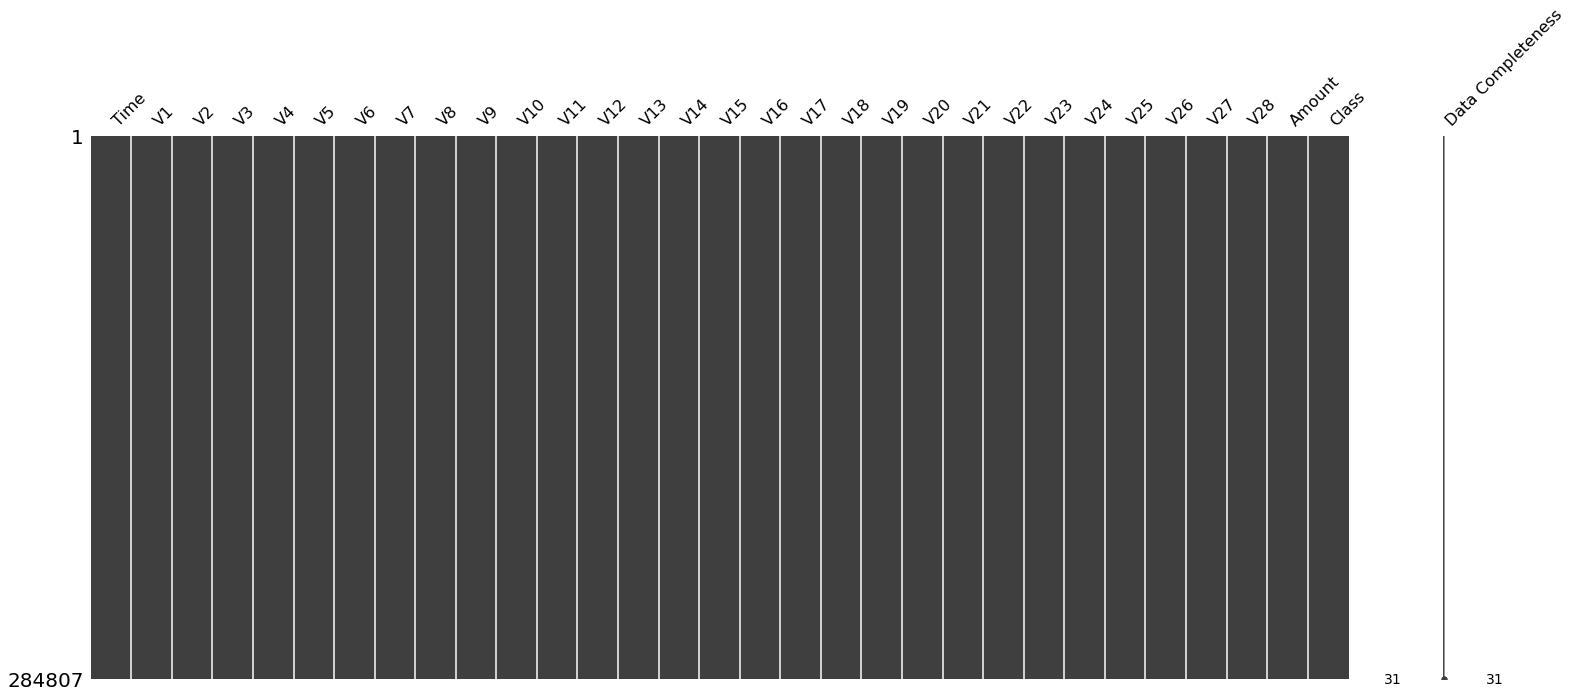

In [41]:
import missingno as msno

msno.matrix(df, labels=True, sort="descending");

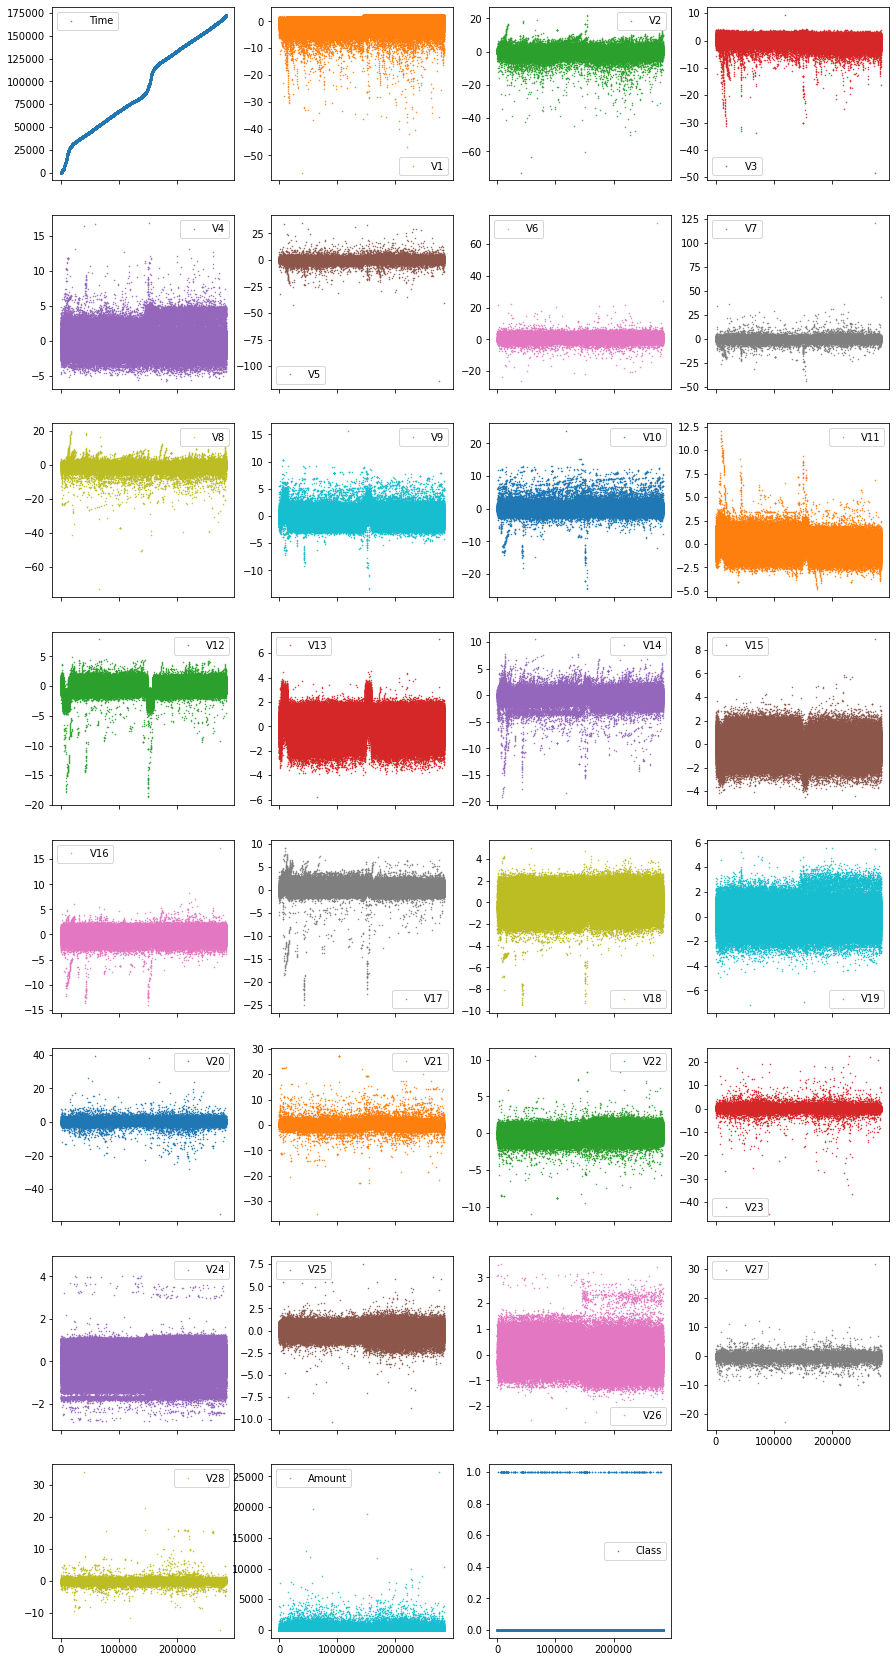

In [42]:
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 4), figsize=(15, 30), markersize=1);

# Preparando os dados

In [43]:
colunas = df.drop(labels=['Time', 'Amount'], axis=1).columns

# Drop duplicates based on 'columns_to_consider'
df = df.drop_duplicates(subset=colunas)
df.shape

(275663, 31)

In [44]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)
df.head()

/tmp/ipykernel_14647/4012136021.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
/tmp/ipykernel_14647/4012136021.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
/home/tomate/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveat

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.710094,-0.993741
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.285967,-0.993741
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.821627,-0.993730
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.355251,-0.993730
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.628311,-0.993718


In [45]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)


df.head()

/home/tomate/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.710094,-0.993741,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.285967,-0.993741,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.821627,-0.993730,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.355251,-0.993730,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.628311,-0.993718,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [46]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=59)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=59)

In [47]:
classes = y.unique()

In [48]:
from sklearn.utils.class_weight import compute_class_weight

weighting = compute_class_weight(class_weight='balanced', classes=classes, y=y)
print(weighting)

[  0.50085941 291.39852008]


In [49]:
from imblearn.combine import SMOTEENN

balancer = SMOTEENN()
X_train, y_train = balancer.fit_resample(X_train, y_train)

# Escolhendo modelos e métricas de avaliação

### Métricas de avaliação

In [50]:
from sklearn.metrics import precision_recall_curve, recall_score, precision_score
from sklearn.metrics import roc_auc_score, PrecisionRecallDisplay, plot_confusion_matrix
from sklearn.model_selection import cross_val_score, KFold

In [51]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
metrics = ['Average Precision', 'AUC Precision Recall']
model = []
recall_score_s = []
precision_score_s = []
auc_precision_recall = []
cross_val = []

In [52]:
def preresultados(nome_modelo, ml, features, target, features_val, target_val):
    
    y_predict = ml.predict(features_val)
    y_predict_prob = ml.predict_proba(features_val)[:, 1]

    score = cross_val_score(ml, features, target, scoring='recall', cv=cv, n_jobs=-1)
    recall_score_ = recall_score(target_val, y_predict, average = 'weighted')
    precision_score_ = precision_score(target_val, y_predict, average = 'weighted')
    model_auc = roc_auc_score(target_val, y_predict_prob)
    
    model.append(nome_modelo)
    recall_score_s.append(recall_score_)
    precision_score_s.append(precision_score_)
    auc_precision_recall.append(model_auc)
    cross_val.append(score.mean())
    
    return print(f'Cross Val Score: {score.mean()} \nRecall: {recall_score_} \nPrecision: {precision_score_} \nArea Under Curve: {model_auc}')

### Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(solver='lbfgs', class_weight='balanced', random_state=59, max_iter=10000)

In [54]:
%%time
logistic.fit(X_train, y_train)

CPU times: user 13.1 s, sys: 4.62 s, total: 17.8 s
Wall time: 5.91 s


LogisticRegression(class_weight='balanced', max_iter=10000, random_state=59)

In [55]:
preresultados('Logistic Regression', logistic, X_train, y_train, X_val, y_val)

Cross Val Score: 0.9124689693340746 
Recall: 0.9695022413391029 
Precision: 0.9979463291294003 
Area Under Curve: 0.9896078921403163


### Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [57]:
%%time
tree.fit(X_train, y_train)

CPU times: user 20.9 s, sys: 235 ms, total: 21.1 s
Wall time: 21.6 s


DecisionTreeClassifier()

In [58]:
preresultados('Decision Tree', tree, X_train, y_train, X_val, y_val)

Cross Val Score: 0.999033595794244 
Recall: 0.9967869820951986 
Precision: 0.998195399895746 
Area Under Curve: 0.8798868239295822


### Bernoulli

In [59]:
from sklearn.naive_bayes import BernoulliNB

bernoulli = BernoulliNB()

In [60]:
%%time
bernoulli.fit(X_train, y_train)

CPU times: user 261 ms, sys: 28.2 ms, total: 289 ms
Wall time: 248 ms


BernoulliNB()

In [61]:
preresultados('Bernoulli', bernoulli, X_train, y_train, X_val, y_val)

Cross Val Score: 0.8172578574348301 
Recall: 0.991319669370093 
Precision: 0.9979149305685785 
Area Under Curve: 0.9645027328434554


### Linear Discriminant Analysis

In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

In [63]:
%%time
lda.fit(X_train, y_train)

CPU times: user 3.33 s, sys: 569 ms, total: 3.9 s
Wall time: 2.54 s


LinearDiscriminantAnalysis()

In [64]:
preresultados('Linear Discriminant Analysis', lda, X_train, y_train, X_val, y_val)

Cross Val Score: 0.8338500783070604 
Recall: 0.9844272277355998 
Precision: 0.9978835240399669 
Area Under Curve: 0.9647433983330304


### Quadratic Discriminant Analysis

In [65]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()

In [66]:
%%time
qda.fit(X_train, y_train)

CPU times: user 2.69 s, sys: 876 ms, total: 3.57 s
Wall time: 1.72 s


QuadraticDiscriminantAnalysis()

In [67]:
preresultados('Quadratic Discriminant Analysis', qda, X_train, y_train, X_val, y_val)

Cross Val Score: 0.871544562831566 
Recall: 0.9725597906356075 
Precision: 0.997846926479368 
Area Under Curve: 0.9811498714719705


### KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

In [69]:
%%time
knn.fit(X_train, y_train)

CPU times: user 2.3 s, sys: 4.15 ms, total: 2.31 s
Wall time: 2.32 s


KNeighborsClassifier(n_neighbors=3)

In [70]:
preresultados('KNN', knn, X_train, y_train, X_val, y_val)

Cross Val Score: 1.0 
Recall: 0.9974606793978182 
Precision: 0.9985583620218226 
Area Under Curve: 0.9367794640770648


### Ada Boost Classifier

In [71]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

In [72]:
%%time
ada.fit(X_train, y_train)

CPU times: user 1min 33s, sys: 571 ms, total: 1min 33s
Wall time: 1min 33s


AdaBoostClassifier()

In [73]:
preresultados('ADA Boost', ada, X_train, y_train, X_val, y_val)

Cross Val Score: 0.9553180729677768 
Recall: 0.9744513253698858 
Precision: 0.9978565806743234 
Area Under Curve: 0.9719692052034379


### Random Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()

In [75]:
%%time
randomforest.fit(X_train, y_train)

CPU times: user 3min 13s, sys: 295 ms, total: 3min 13s
Wall time: 3min 14s


RandomForestClassifier()

In [76]:
preresultados('Random Forest', randomforest, X_train, y_train, X_val, y_val)

/home/tomate/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Cross Val Score: 1.0 
Recall: 0.9994040370015288 
Precision: 0.9993885372303826 
Area Under Curve: 0.9892055929166775


### Gradient Boosting Classifier

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

gradboosting = GradientBoostingClassifier()

In [78]:
%%time
gradboosting.fit(X_train, y_train)

CPU times: user 7min 27s, sys: 843 ms, total: 7min 28s
Wall time: 7min 29s


GradientBoostingClassifier()

In [79]:
preresultados('Gradient Boosting', gradboosting, X_train, y_train, X_val, y_val)

Cross Val Score: 0.9764469825007079 
Recall: 0.9864742310781748 
Precision: 0.9980006323984437 
Area Under Curve: 0.9830248877002571


### Hist Gradient Boosting

In [80]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

histboosting = HistGradientBoostingClassifier()

In [81]:
%%time
histboosting.fit(X_train, y_train)

CPU times: user 8.29 s, sys: 99.7 ms, total: 8.39 s
Wall time: 8.74 s


HistGradientBoostingClassifier()

In [82]:
preresultados('Hist Gradient Boosting', histboosting, X_train, y_train, X_val, y_val)

Cross Val Score: 0.9999935329496218 
Recall: 0.9982639338740186 
Precision: 0.9988588308184425 
Area Under Curve: 0.9762331874951315


### Light GBM

In [83]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(max_depth=5, num_leaves=70)


In [84]:
%%time
lgbm.fit(X_train, y_train)

CPU times: user 10.9 s, sys: 127 ms, total: 11 s
Wall time: 4.03 s


LGBMClassifier(max_depth=5, num_leaves=70)

In [85]:
preresultados('Light GBM', lgbm, X_train, y_train, X_val, y_val)

Cross Val Score: 0.9987613727320884 
Recall: 0.9940662814500039 
Precision: 0.9982280261241689 
Area Under Curve: 0.9798204502375821


# Avaliando os resultados 

In [86]:
results = pd.DataFrame(index=model)
results['Recall'] = recall_score_s
results['Precision'] = precision_score_s
results['Mean Cross Val Score'] = cross_val
results['AUC Precision Recall'] = auc_precision_recall
results['Equilibrio'] = ((results.Recall*2) + results.Precision) / 3
display(results.sort_values(by=['Equilibrio'], ascending=False)[0:3])

,Recall,Precision,Mean Cross Val Score,AUC Precision Recall,Equilibrio
Random Forest,0.999404,0.999389,1.000000,0.989206,0.999399
Hist Gradient Boosting,0.998264,0.998859,0.999994,0.976233,0.998462
KNN,0.997461,0.998558,1.000000,0.936779,0.997827


# Ajustando os melhores modelos

In [87]:
from skopt import gp_minimize

### Random Forest

In [88]:
space = [(100, 1200), # n_estimators
         (5, 40), # max_depth
         (2, 100), # min_samples_split
         (1, 20), # min_samples_leaf
         (['auto', 'sqrt']), # max_features
         (True, False) # bootstrap
         ]

In [89]:
def tunning(params):
    n_estimators = params[0]
    max_depth = params[1]
    min_samples_split = params[2]
    min_samples_leaf = params[3]
    max_features = params[4]
    bootstrap = params[5]

    print(params, '\n')
    mdl = RandomForestClassifier(random_state=0, 
                                         n_estimators=n_estimators, 
                                         max_depth=max_depth, 
                                         min_samples_split=min_samples_split,
                                         min_samples_leaf=min_samples_leaf,
                                         max_features=max_features,
                                         bootstrap=bootstrap)
    mdl.fit(X_train, y_train)
    y_predict = mdl.predict(X_val)
    return -recall_score(y_val, y_predict, average = 'weighted')

In [90]:
%%time

resultados_gp = gp_minimize(tunning, space, random_state=1, verbose=1, n_calls=30, n_random_starts=10)

Iteration No: 1 started. Evaluating function at random point.
[1197, 38, 15, 20, 'auto', False] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 3279.1670
Function value obtained: -0.9993
Current minimum: -0.9993
Iteration No: 2 started. Evaluating function at random point.
[527, 28, 94, 17, 'auto', True] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 863.0066
Function value obtained: -0.9991
Current minimum: -0.9993
Iteration No: 3 started. Evaluating function at random point.
[588, 13, 54, 18, 'auto', False] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 1381.5983
Function value obtained: -0.9985
Current minimum: -0.9993
Iteration No: 4 started. Evaluating function at random point.
[1133, 32, 72, 16, 'auto', True] 

Iteration No: 4 ended. Evaluation done at random point.
Time taken: 1791.0121
Function value obtained: -0.9992
Current minimum: -0.9993
Iteration No: 5 started. Evaluating function at random point.
[1052, 

In [91]:
n_estimators = resultados_gp.x[0]
max_depth = resultados_gp.x[1]
min_samples_split = resultados_gp.x[2]
min_samples_leaf = resultados_gp.x[3]
max_features = resultados_gp.x[4]
bootstrap = resultados_gp.x[5]

In [92]:
randomforest = RandomForestClassifier(random_state=0, 
                                         n_estimators=n_estimators, 
                                         max_depth=max_depth, 
                                         min_samples_split=min_samples_split,
                                         min_samples_leaf=min_samples_leaf,
                                         max_features=max_features,
                                         bootstrap=bootstrap)

In [93]:
randomforest.fit(X_train, y_train)
y_predict = randomforest.predict(X_val)
recall_score_ = recall_score(y_val, y_predict, average = 'weighted')
score = cross_val_score(randomforest, X_train, y_train, scoring='recall', cv=cv, n_jobs=-1)


In [94]:
print('Random Forest')
print(f'Recall Score: {recall_score_}')
print(f'Cross Val Score: {score.mean()}')

Random Forest
Recall Score: 0.9994299484362449
Cross Val Score: 1.0


### Hist Gradient Boosting

In [95]:
space2 = [(50, 255), # max_bins
          (1e-3, 1e-1, 'log-uniform'), # learning_rate
          (101, 300), # max_iter
          (31, 62), # max_leaf_nodes
          (1, 6)] # max_depth

In [113]:
def tunning2(params):
    max_bins=params[0]
    learning_rate=params[1]
    max_iter=params[2]
    max_leaf_nodes=params[3]
    max_depth=params[4]
    
    print(params, '\n')
    mdl = HistGradientBoostingClassifier(random_state=0, 
                                 max_bins=max_bins,
                                 learning_rate=learning_rate,
                                 max_iter=max_iter,
                                 max_leaf_nodes=max_leaf_nodes,
                                 max_depth=max_depth)
                                 
    mdl.fit(X_train, y_train)
    y_predict = mdl.predict(X_val)
    return -recall_score(y_val, y_predict)

In [114]:
%%time
resultados_gp = gp_minimize(tunning2, space2, random_state=1, verbose=1, n_calls=30, n_random_starts=10)

Iteration No: 1 started. Evaluating function at random point.
[254, 0.07330181339535062, 126, 62, 2] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 9.0288
Function value obtained: -0.9375
Current minimum: -0.9375
Iteration No: 2 started. Evaluating function at random point.
[131, 0.0059678992438367785, 234, 60, 5] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 16.2246
Function value obtained: -0.9125
Current minimum: -0.9375
Iteration No: 3 started. Evaluating function at random point.
[114, 0.011196861833252303, 189, 38, 4] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 12.0758
Function value obtained: -0.9125
Current minimum: -0.9375
Iteration No: 4 started. Evaluating function at random point.
[237, 0.008211256449180221, 187, 60, 5] 

Iteration No: 4 ended. Evaluation done at random point.
Time taken: 14.1804
Function value obtained: -0.9000
Current minimum: -0.9375
Iteration No: 5 started. Evaluating function at r

In [115]:
max_bins=resultados_gp.x[0]
learning_rate=resultados_gp.x[1]
max_iter=resultados_gp.x[2]
max_leaf_nodes=resultados_gp.x[3]
max_depth=resultados_gp.x[4]

In [121]:
histboosting = HistGradientBoostingClassifier(random_state=0, 
                                              max_bins=max_bins,
                                              learning_rate=learning_rate,
                                              max_iter=max_iter,
                                              max_leaf_nodes=max_leaf_nodes,
                                              max_depth=max_depth)

In [122]:
histboosting.fit(X_train, y_train)
y_predict = histboosting.predict(X_val)
recall_score_ = recall_score(y_val, y_predict)
score = cross_val_score(histboosting, X_train, y_train, scoring='recall', cv=cv, n_jobs=-1)

In [123]:
print('Hist Gradient Boosting')
print(f'Recall Score: {recall_score_}')
print(f'Cross Val Score: {score.mean()}')

Hist Gradient Boosting
Recall Score: 0.9375
Cross Val Score: 0.933727639501363


### KNN

In [102]:
space3 = [(1, 10), # n_neighbors
          (15, 45), # leaf_size
          (1, 4), # p
          (1, 100), # n_jobs
          (['uniform', 'distance']), # weights
          (['auto', 'ball_tree', 'kd_tree', 'brute'])] # algorithm

In [103]:
def tunning3(params):
    n_neighbors=params[0]
    leaf_size=params[1]
    p=params[2]
    n_jobs=params[3]
    weights=params[4]
    algorithm=params[5]

    
    print(params, '\n')
    mdl = KNeighborsClassifier(n_neighbors=n_neighbors,
                               leaf_size=leaf_size,
                               p=p,
                               n_jobs=n_jobs,
                               weights=weights,
                               algorithm=algorithm)
                                 
    mdl.fit(X_train, y_train)
    y_predict = mdl.predict(X_val)
    return -recall_score(y_val, y_predict, average = 'weighted')

In [104]:
%%time
resultados_gp = gp_minimize(tunning3, space3, random_state=1, verbose=1, n_calls=30, n_random_starts=10)

Iteration No: 1 started. Evaluating function at random point.
[10, 43, 1, 100, 'distance', 'ball_tree'] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 312.6806
Function value obtained: -0.9959
Current minimum: -0.9959
Iteration No: 2 started. Evaluating function at random point.
[4, 35, 4, 85, 'distance', 'brute'] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 3287.6842
Function value obtained: -0.9968
Current minimum: -0.9968
Iteration No: 3 started. Evaluating function at random point.
[5, 22, 3, 91, 'distance', 'ball_tree'] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 1415.3700
Function value obtained: -0.9962
Current minimum: -0.9968
Iteration No: 4 started. Evaluating function at random point.
[9, 38, 3, 80, 'distance', 'brute'] 

Iteration No: 4 ended. Evaluation done at random point.
Time taken: 3276.7757
Function value obtained: -0.9947
Current minimum: -0.9968
Iteration No: 5 started. Evaluating function at

In [105]:
n_neighbors=resultados_gp.x[0]
leaf_size=resultados_gp.x[1]
p=resultados_gp.x[2]
n_jobs=resultados_gp.x[3]
weights=resultados_gp.x[4]
algorithm=resultados_gp.x[5]

In [106]:
knn = KNeighborsClassifier(n_neighbors=n_neighbors,
                           leaf_size=leaf_size,
                           p=p,
                           n_jobs=n_jobs,
                           weights=weights,
                           algorithm=algorithm)

In [107]:
knn.fit(X_train, y_train)
y_predict = knn.predict(X_val)
recall_score_ = recall_score(y_val, y_predict, average = 'weighted')
score = cross_val_score(knn, X_train, y_train, scoring='recall', cv=cv, n_jobs=-1)

In [108]:
print('Random Forest')
print(f'Recall Score: {recall_score_}')
print(f'Cross Val Score: {score.mean()}')

Random Forest
Recall Score: 0.9986266939600446
Cross Val Score: 1.0


# Fazendo previsões

In [109]:
def resultados(nome_modelo, ml, features, target):
    y_predict = ml.predict(features)
    y_predict_prob = ml.predict_proba(features)[:, 1]
    recall_score_ = recall_score(target, y_predict)
    precision_score_ = precision_score(target, y_predict)
    precision, recall, thresholds = precision_recall_curve(target, y_predict_prob)
    disp = PrecisionRecallDisplay(precision, recall)
    print(nome_modelo)
    print(f'Recall Score: {recall_score_}')
    print(f'Precision Score: {precision_score_}')
    plot_confusion_matrix(ml, features, target)
    disp.plot()
    plt.show()
    

### Random Forest

Random Forest
Recall Score: 0.8028169014084507
Precision Score: 0.8507462686567164


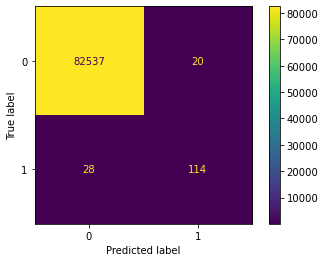

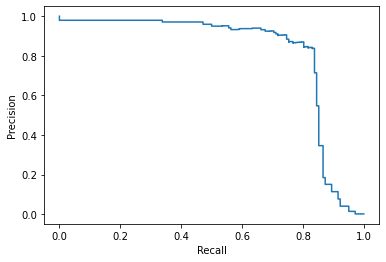

In [110]:
resultados('Random Forest', randomforest, X_test, y_test)

### Hist Gradient Boosting

Hist Gradient Boosting
Recall Score: 0.8873239436619719
Precision Score: 0.07167235494880546


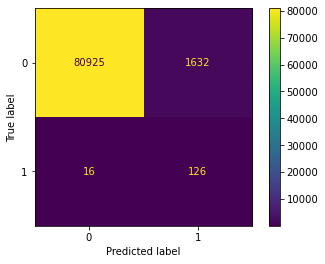

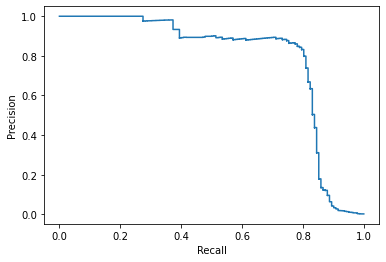

In [124]:
resultados('Hist Gradient Boosting', histboosting, X_test, y_test)

### KNN

KNN
Recall Score: 0.823943661971831
Precision Score: 0.5735294117647058


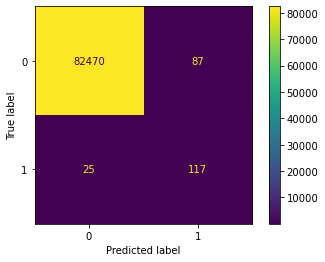

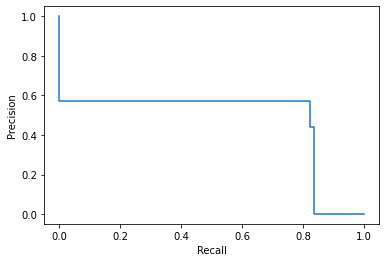

In [ ]:
resultados('KNN', knn, X_test, y_test)

# Conclusão

O RobustScaler lidou bem com os outliers, uniformizando de modo satisfatório os dados.

A implementação do SMOTEENN em nosso conjunto de dados equilibrou o conjunto de dados sem gerar problemas de overfitting e ajudou a aumentar o desempenho dos modelos.

Para esse problema de negócio o mais importante é identificar o maior número de transações fraudulentas possíveis. no entanto classificar erroneamente uma transação segura como fraude pode gerar um novo problema de negócio. 

Desse modo os modelos priorizados foram os que melhor equilibraram Recall e Precision. 

Para trabalhos futuros podemos:
1. Testar novos modelos. para encontrar modelos com performance semelhante ou superior a um custo computacional menor;
2. Utilizar uma base de dados que não seja o produto de uma transformação PCA.
3. Otimizar a fase de pré-processamento de dados com a exclusão de atributos de menor relevância